# Afghanistan - Natural Disaster Incidents in 2016-2018


## Data Set Information: [The Humanitarian Data Exchange](https://data.humdata.org)

Natural disaster events include avalanches, earthquakes, flooding, heavy rainfall & snowfall, and landslides & mudflows. A natural disaster incident is defined as an event that has affected (i.e. impacted) people, who may or may not require humanitarian assistance.

## Objective:

We want to explore the  data to uncover the major causes of natural disaster in Afghanistan and how people are affected by them. We will also build a machine learning model that would predict the number of families that are affected by natural disaster in Afghanistan.

## Practice Skills:

- Data cleaning

- Exploratory data analysis

- Advanced regression techniques such as XGBoost and Random forest

## Import data manipulation and visualization library

In [1]:
%matplotlib inline
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt

# Seaborn for data visualization
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')

## Load and examine the Data

In [2]:
df1 = pd.read_csv('afghanistan-natural-disaster-incidents-from-1-january-to-31-dec-2016.csv')
df2 = pd.read_csv('afghanistan-natural-disaster-incidents-from-1-january-to-31-december-2017.csv')
df3= pd.read_csv('afghanistan-natural-disaster-incidents-from-january-to-june-2018.csv')

In [3]:
df1.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed
0,#adm1 +name +en,#adm2 +code,#adm2 +name +en,#adm3 +code,#adm3 +name +en,#cause+date,#cause +type,#affected +killed +num,#affected +injured +num,#affected +individual +num,#affected +family +num,#damaged+houses+num,#destroyed+houses+num
1,Western,31,Farah,3101,Farah,11/03/2016,Flood / flash flood,18,9,996,150,88,32
2,Western,30,Hirat,3003,Kushk,11/03/2016,Flood / flash flood,0,0,169,21,21,0
3,Western,30,Hirat,3002,Injil,16/04/2016,Flood / flash flood,1,0,404,54,23,31
4,Western,30,Hirat,3005,Guzara,16/04/2016,Flood / flash flood,0,0,20,3,3,0


In [4]:
df3.tail()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed
241,Western,29,Badghis,2902,Muqur,25/06/18,Drought,0,0,0,0,0,0
242,Southern,23,Uruzgan,2301,Tirinkot,30/06/18,Drought,0,0,0,0,0,0
243,Capital,8,Panjsher,805,Khenj (Hese- Awal),12/07/18,Landslide / mudflow,0,0,917,131,0,131
244,Western,21,Ghor,2101,Chaghcharan,22/07/18,Drought,0,0,322,46,0,0
245,Western,30,Hirat,3002,Injil,43215,Drought,0,0,33610,4801,0,0


- We can see that the last value in INC_DATE is not consistent with the date. Therefore, we will delete it.

In [5]:
# Delete the  indicated indexes
df1 = df1.drop(df1.index[0])
df2 = df2.drop(df2.index[0])
df3 = df3.drop(df3.index[[0, 245]])

In [6]:
# Concatenate the three data sets
df = pd.concat([df1, df2, df3],ignore_index=True, sort = False)

In [7]:
df.head()

,REGION,PROV_CODE,PROV_NAME,DIST_CODE,DIST_NAME,INC_DATE,INC_TYPE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed
0,Western,31,Farah,3101,Farah,11/03/2016,Flood / flash flood,18,9,996,150,88,32
1,Western,30,Hirat,3003,Kushk,11/03/2016,Flood / flash flood,0,0,169,21,21,0
2,Western,30,Hirat,3002,Injil,16/04/2016,Flood / flash flood,1,0,404,54,23,31
3,Western,30,Hirat,3005,Guzara,16/04/2016,Flood / flash flood,0,0,20,3,3,0
4,Western,30,Hirat,3005,Guzara,17/04/2016,Flood / flash flood,0,0,7,1,0,0


In [8]:
# Column names
df.columns

Index(['REGION', 'PROV_CODE', 'PROV_NAME', 'DIST_CODE', 'DIST_NAME',
       'INC_DATE', 'INC_TYPE', 'Persons_killed', 'Persons_injured',
       'Individuals_affected', 'Families_affected', 'Houses_damaged',
       'Houses_destroyed'],
      dtype='object')

In [9]:
# Data shape
df.shape

(989, 13)

## Data types and missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 13 columns):
REGION                  989 non-null object
PROV_CODE               989 non-null object
PROV_NAME               989 non-null object
DIST_CODE               989 non-null object
DIST_NAME               989 non-null object
INC_DATE                989 non-null object
INC_TYPE                989 non-null object
Persons_killed          989 non-null object
Persons_injured         989 non-null object
Individuals_affected    989 non-null object
Families_affected       989 non-null object
Houses_damaged          989 non-null object
Houses_destroyed        989 non-null object
dtypes: object(13)
memory usage: 100.5+ KB


- There are no missing values, but all attributes are objects. We will now convert them to the correct format

## Number attributes to numeric

We will convert all the numbers to float

In [11]:
# Numerical list
num_list = ['PROV_CODE','DIST_CODE', 'Persons_killed', 'Persons_injured','Individuals_affected', 'Families_affected',
           'Houses_damaged', 'Houses_destroyed']

# convert to float
df[num_list] = df[num_list].apply(pd.to_numeric, errors ='coerce')

## Parsing date

Let's look at the incident date attribute

In [12]:
df['INC_DATE'].value_counts().head()

2017-02-04    84
2017-05-12    43
2017-02-18    39
16/04/2016    25
2017-02-03    23
Name: INC_DATE, dtype: int64

- The incident time is encoded in different formats.

In [13]:
df['INC_DATE']= pd.to_datetime(df['INC_DATE'])

In [14]:
df['INC_DATE'].value_counts().head()

2017-02-04    84
2017-05-12    43
2017-02-18    39
2016-04-16    25
2017-02-03    23
Name: INC_DATE, dtype: int64

- We now have the date in the correct format

Let's create another attribute from data time

In [15]:
df['Day_of_week'] = df['INC_DATE'].dt.weekday_name

##  Re-check for data types

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 14 columns):
REGION                  989 non-null object
PROV_CODE               989 non-null int64
PROV_NAME               989 non-null object
DIST_CODE               989 non-null int64
DIST_NAME               989 non-null object
INC_DATE                989 non-null datetime64[ns]
INC_TYPE                989 non-null object
Persons_killed          989 non-null int64
Persons_injured         989 non-null int64
Individuals_affected    989 non-null int64
Families_affected       989 non-null int64
Houses_damaged          989 non-null int64
Houses_destroyed        989 non-null int64
Day_of_week             989 non-null object
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 108.2+ KB


## Count categorical attributes 

In [17]:
df['Day_of_week'].value_counts()

Saturday     225
Friday       167
Sunday       152
Wednesday    138
Monday       126
Thursday      99
Tuesday       82
Name: Day_of_week, dtype: int64

- We can see that the majortity of natural disaster occur on Saturdays

In [18]:
df['INC_TYPE'].value_counts()

Flood / flash flood    727
Heavy snowfall         115
Drought                 57
Avalanche               32
Earthquake              30
Landslide / mudflow     28
Name: INC_TYPE, dtype: int64

- The cause of most natural disaster is Flood or Flash Flood

In [19]:
df['REGION'].value_counts()

Eastern             187
Central Highland    179
Western             174
North Eastern       160
Capital              96
Northern             86
South Eastern        75
Southern             32
Name: REGION, dtype: int64

In [20]:
df['PROV_NAME'].value_counts().head()

Bamyan        123
Kunar         115
Badakhshan     81
Hirat          69
Ghor           63
Name: PROV_NAME, dtype: int64

In [21]:
df['DIST_NAME'].value_counts().head()

Chaghcharan    41
Waras          39
Panjab         36
Injil          32
Asadabad       24
Name: DIST_NAME, dtype: int64

- Most natural disaster occur in the Eastern part of the country and the province Bamyan and district Chaghcharan are highly affected

## Statistical description

In [22]:
df.describe()

,PROV_CODE,DIST_CODE,Persons_killed,Persons_injured,Individuals_affected,Families_affected,Houses_damaged,Houses_destroyed
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,15.949444,1600.348837,0.388271,0.270981,223.254803,33.399393,18.890799,8.596562
std,8.425277,842.163960,2.255202,1.482481,641.849868,93.604189,78.234467,32.392957
min,1.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1004.000000,0.000000,0.000000,11.000000,2.000000,0.000000,0.000000
50%,15.000000,1501.000000,0.000000,0.000000,49.000000,7.000000,2.000000,0.000000
75%,22.000000,2203.000000,0.000000,0.000000,175.000000,27.000000,13.000000,3.000000
max,34.000000,3405.000000,52.000000,25.000000,13489.000000,1927.000000,1500.000000,600.000000


## Correlation matrix

In [23]:
corr_matrix = df.corr()

Let's look at the heat map of the correlations

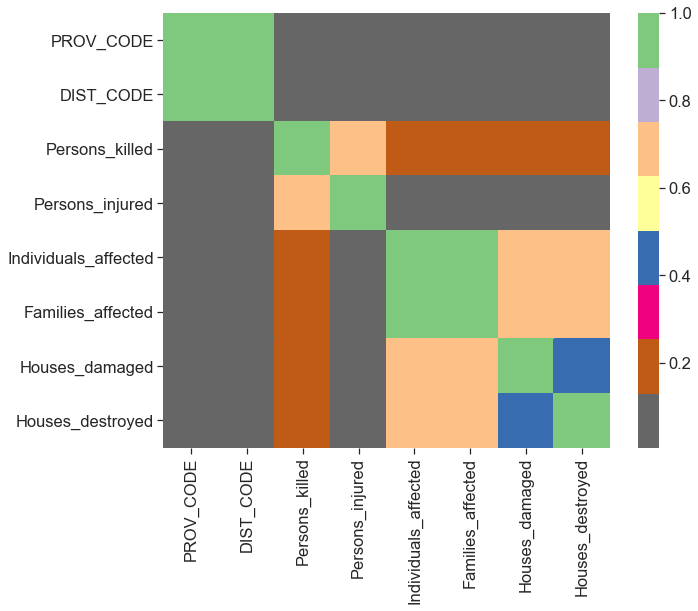

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix,  xticklabels = corr_matrix.columns, yticklabels=corr_matrix.columns,
          fmt="g", cmap='Accent_r')  

- There are many between-predictor correlations. We will deal with them later using PCA

Let's look at the features that are strongly correlated with the target variable

In [25]:
corr_matrix['Families_affected'].sort_values(ascending = False)

Families_affected       1.000000
Individuals_affected    0.991414
Houses_damaged          0.727905
Houses_destroyed        0.693953
Persons_killed          0.221888
PROV_CODE               0.125389
DIST_CODE               0.125300
Persons_injured         0.039533
Name: Families_affected, dtype: float64

- We can see that the individuals affected is highly correlated with the families affected, since families are made up of individuals

## Exploratory Data Analysis

We can also look at the pair plots of numerical attributes to see those that are highly correlated with each other as well as the target variable

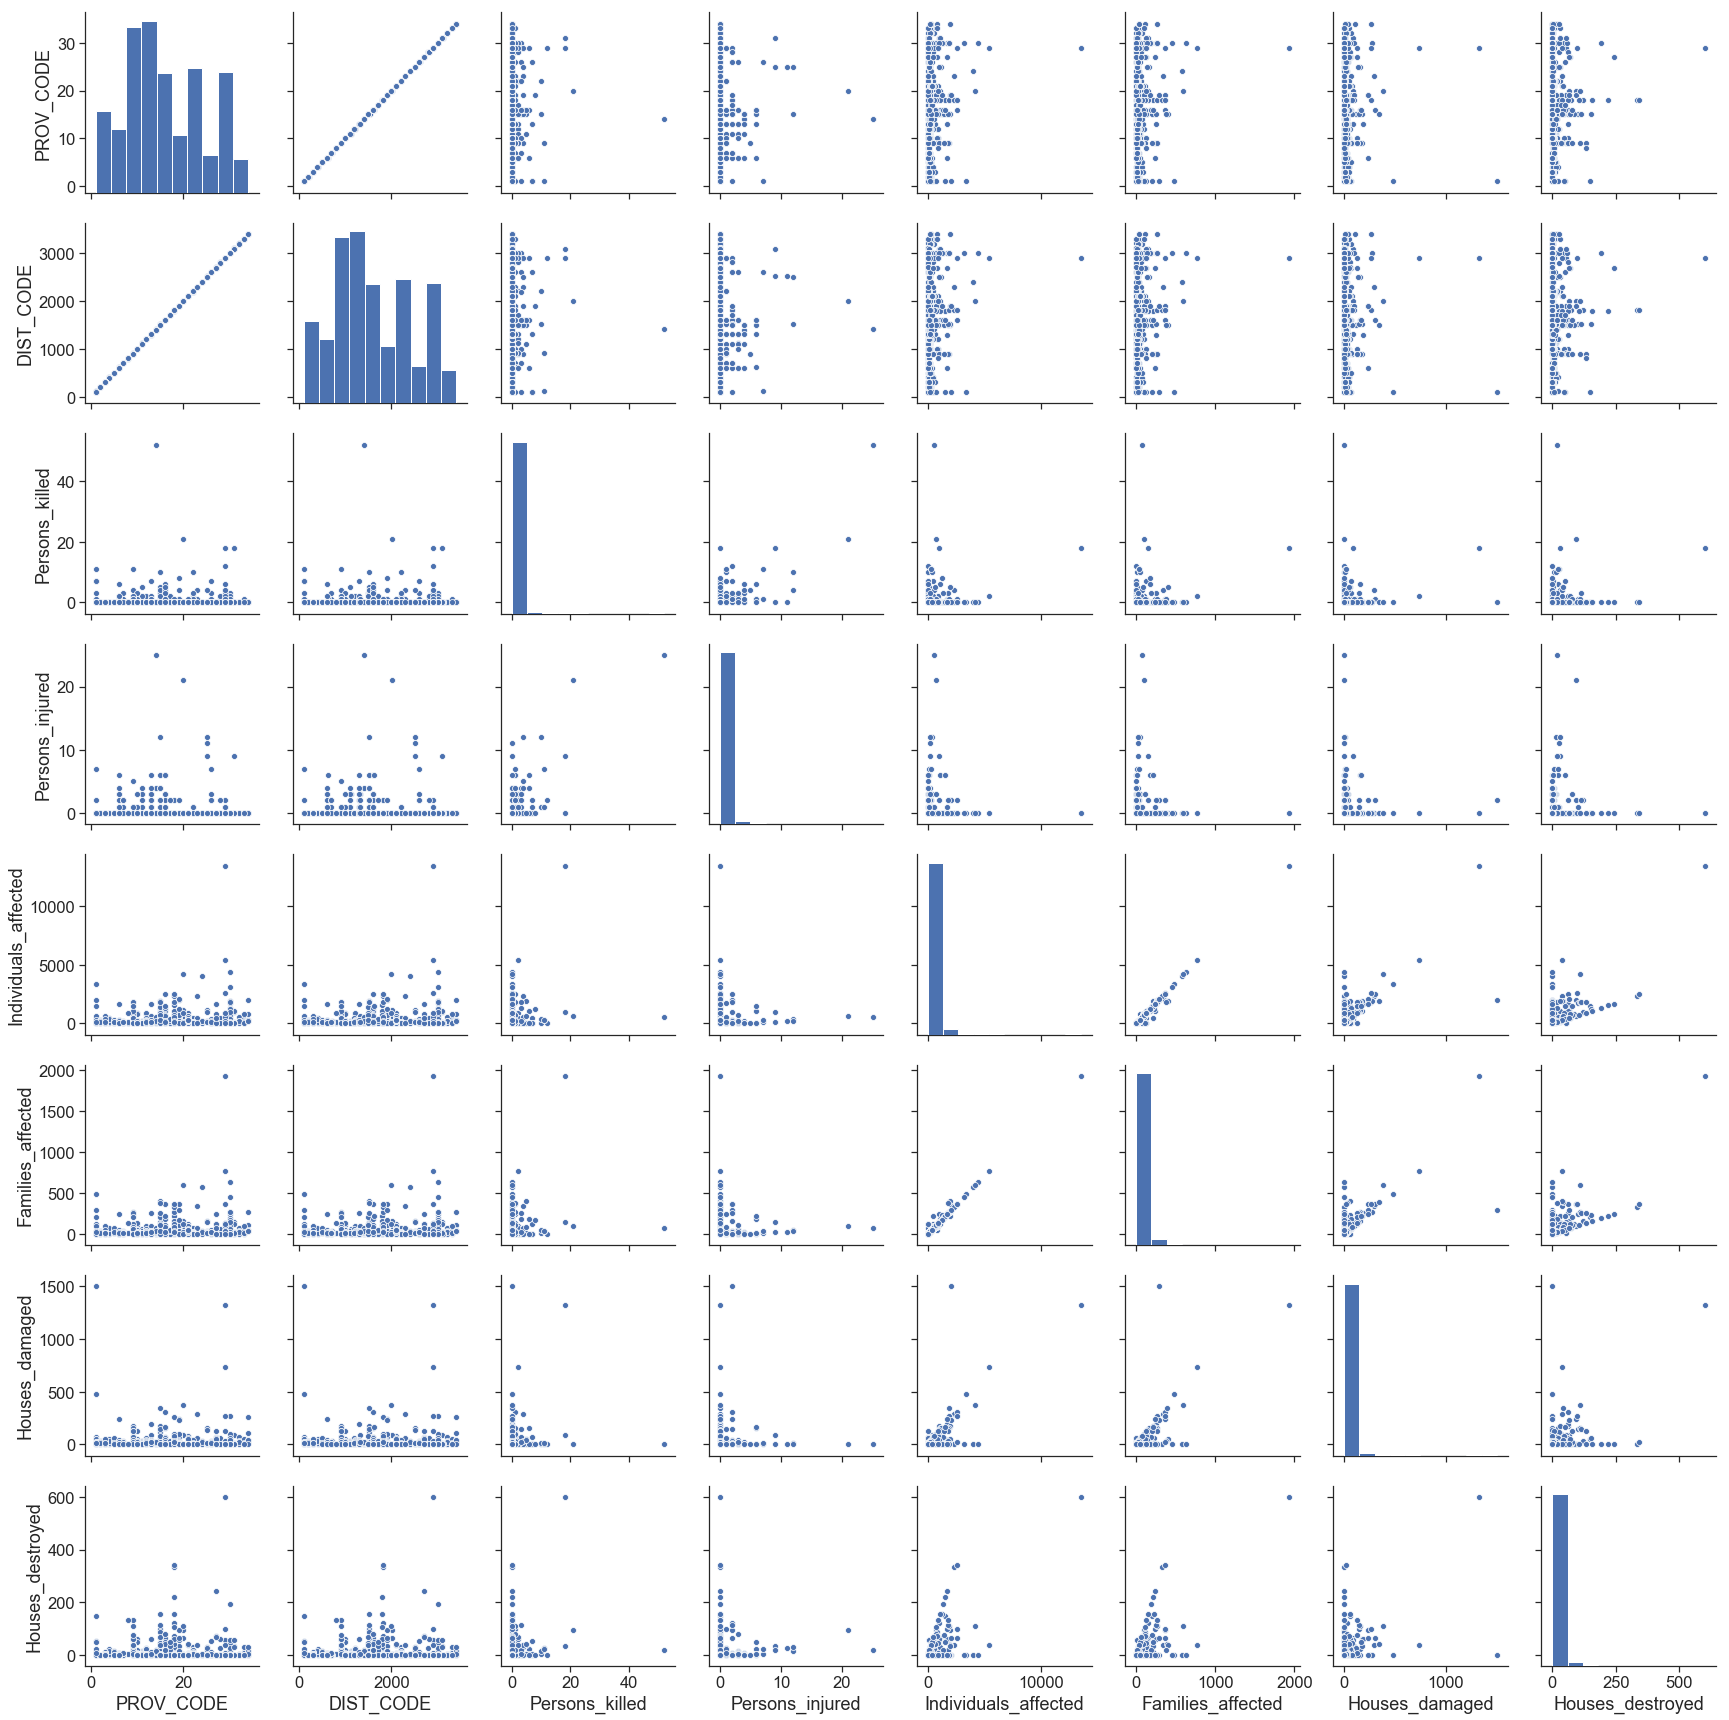

In [26]:
# make pairplot
sns.pairplot(data = df, height = 3)

- We can see that the target variable Families_affected is highly skewed.

Let's look at the categorical plot of the attributes

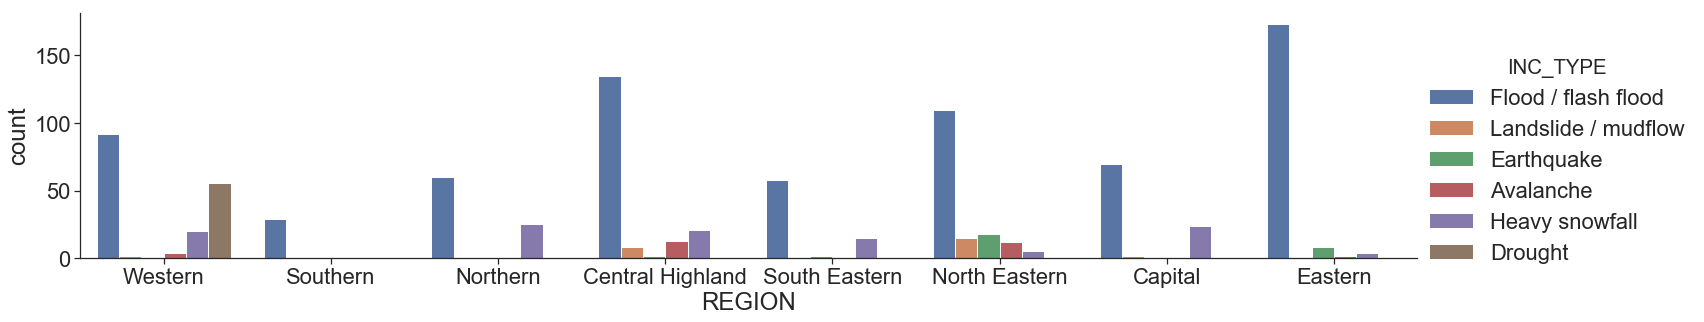

In [27]:
# Set font scale and style
sns.set(font_scale = 2)
sns.set_style('ticks')

sns.catplot(data = df, x = 'REGION', kind = 'count', aspect = 4, hue = 'INC_TYPE')

- The Eastern part of the country is heavily affected by flood and slightly by Earthquakes, but the North Eartern part of the country is almost affected by every natural disaster

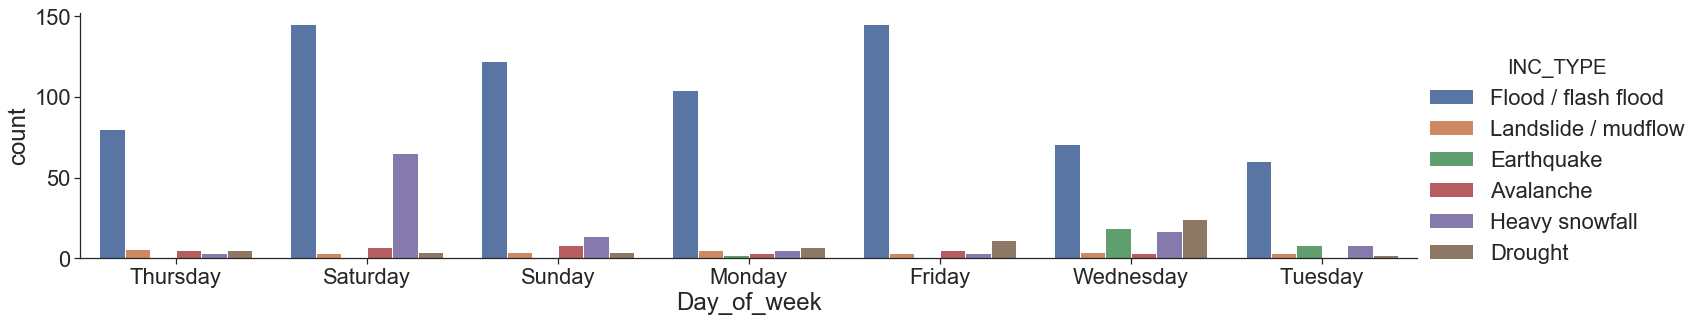

In [28]:
sns.catplot(data = df, x = 'Day_of_week', kind = 'count', aspect = 4, hue = 'INC_TYPE')

- Fridays and Saturdays are heavily affected by Flood

- Saturdays are also affected by Heavy snowfall

- Wednesdays are affected by Earthquakes.

Let's look at the bar plots of numerical and categorical variables

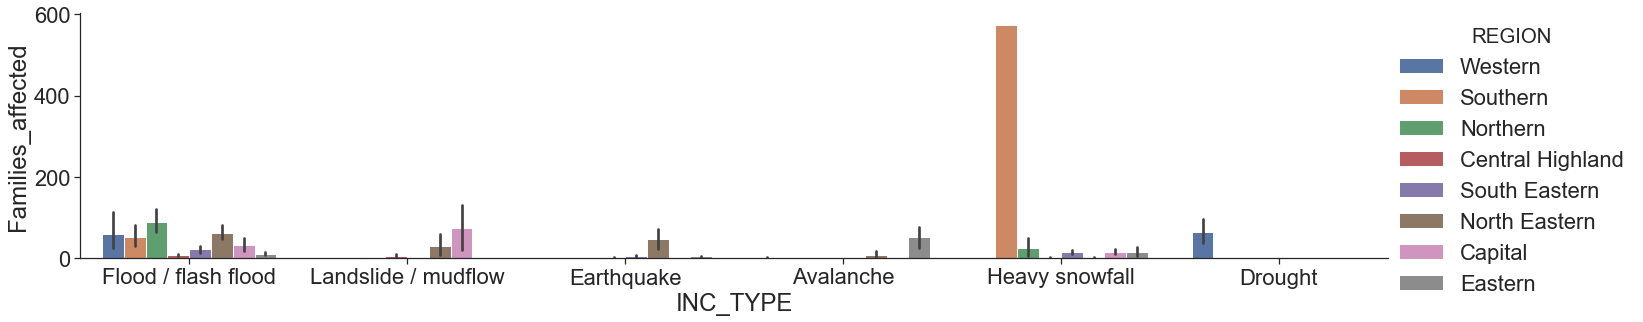

In [29]:
sns.catplot(data = df, x = 'INC_TYPE', y = 'Families_affected', kind = 'bar', aspect = 4,  hue = 'REGION')

- Most families in the Southern part of the country are heavily affected by Heavy snowfall.

- Most families in the Western part of the country are heavily affected by Drought. 

- The families in the Eastern part suffer mostly from Avalanche.

- The families in the Capital are mainly affected by Landslide/mudflow. 

- The families in the Northern part suffer mainly from Flood/Flash Flood.

- The families in the North Eastern part are heavily affected by Flood and Earthquakes

- The families in the South Eastern part are heavily affected by Flood and Heavy snowfall

- The families in the Central Highland are heavily affected by Flood

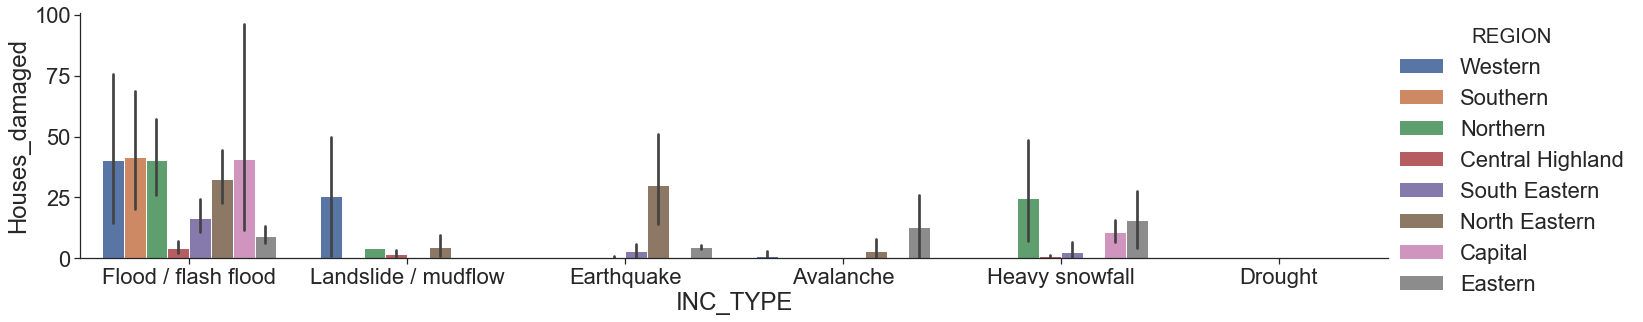

In [30]:
sns.catplot(data = df, x = 'INC_TYPE', y = 'Houses_damaged', kind = 'bar', aspect = 4,  hue = 'REGION')

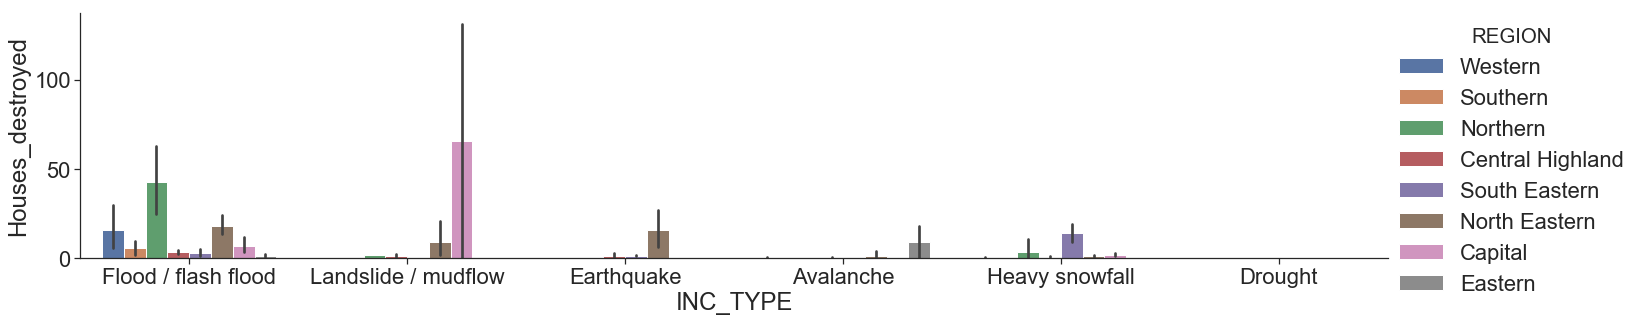

In [31]:
sns.catplot(data = df, x = 'INC_TYPE', y = 'Houses_destroyed', kind = 'bar', aspect = 4,  hue = 'REGION')

- Most houses are damaged by Flood, whereas most houses are destroyed by Landslide/mudflow

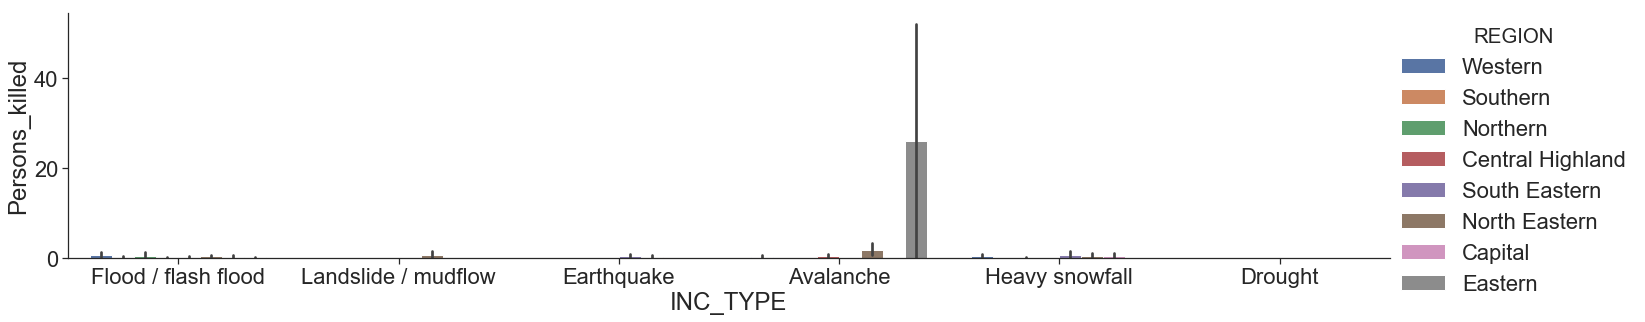

In [32]:
sns.catplot(data = df, x = 'INC_TYPE', y = 'Persons_killed', kind = 'bar', aspect = 4,  hue = 'REGION')

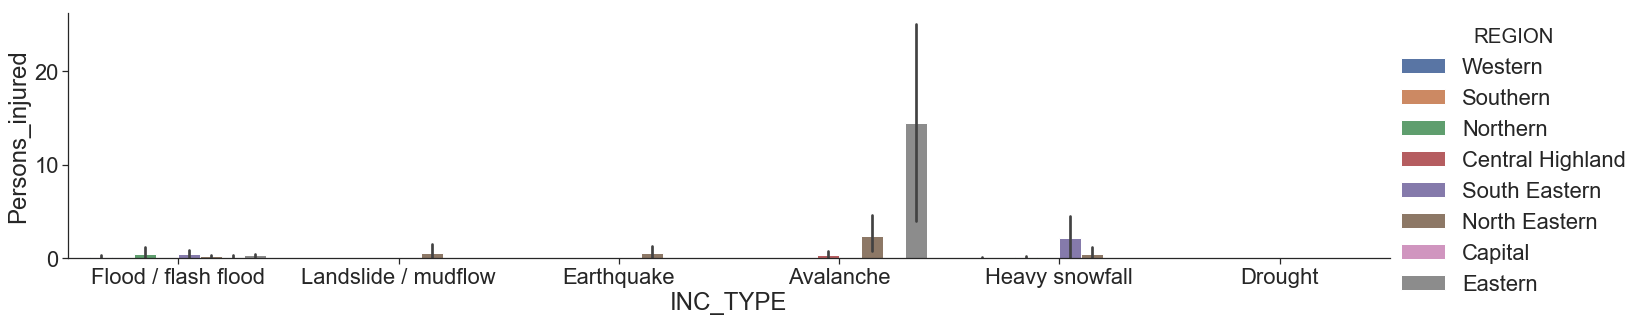

In [33]:
sns.catplot(data = df, x = 'INC_TYPE', y = 'Persons_injured', kind = 'bar', aspect = 4,  hue = 'REGION')

- People are mainly killed and injured by Avalanche in the Eastern part of the country

We will skip the analysis with the PROVINCES and the DISTRICTS as they have too many category.

# Prepare the Data for Machine Learning Algorithms

## Logarithm transformation of target variable

 As we saw above the target variable is highly skewed, we will now tranform it using log(1+x) because it contains zeros.

Text(0.5,0,'Families affected')

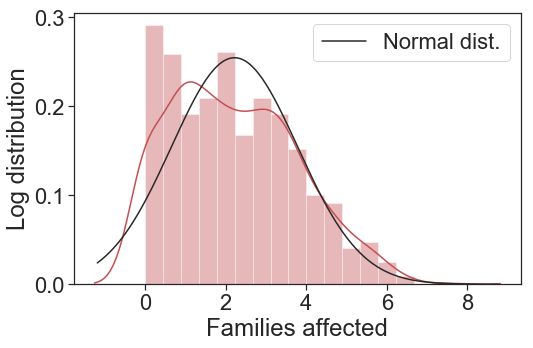

In [34]:
# Import normal distribution from scipy
from scipy.stats import norm

# Log(1+x) transformation
df['Families_affected'] = np.log1p(df['Families_affected']) 

# Set figure size
fig = plt.figure(figsize = (8,5))

# Distribution of the HIV in adults
sns.distplot(df['Families_affected'],  fit = norm, color = 'r')

# Legend and labels
plt.legend(['Normal dist.'],loc='best')
plt.ylabel('Log distribution')
plt.xlabel('Families affected')

## Log-transform of the skewed numerical attributes

In [49]:
num_att = list(df.select_dtypes('number'))

for col in num_att:
    if col == 'Families_affected':
        next
    else:
        df[col] = np.log1p(df[col])

## Feature Matrix and Target Variable

For simplicity, we will drop the attributes with too many categories such as PROV_NAME and DIST_NAME. We will also drop the incident date (INC_DATE) attribute as we have created the Day of week attribute from it

In [36]:
# Feature matrix
X = df.drop(['PROV_NAME', 'DIST_NAME','INC_DATE', 'Families_affected'], axis =1)

# Target variable
y = df['Families_affected']

In [37]:
print(X.shape)
print(y.shape)

(989, 10)
(989,)


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 10 columns):
REGION                  989 non-null object
PROV_CODE               989 non-null float64
DIST_CODE               989 non-null float64
INC_TYPE                989 non-null object
Persons_killed          989 non-null float64
Persons_injured         989 non-null float64
Individuals_affected    989 non-null float64
Houses_damaged          989 non-null float64
Houses_destroyed        989 non-null float64
Day_of_week             989 non-null object
dtypes: float64(7), object(3)
memory usage: 77.3+ KB


## Create a Test Set

In [39]:
# import train test split library
from sklearn.model_selection import train_test_split

In [40]:
# Create a 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [41]:
print('Training  set size:', X_train.shape)
print('Test set size:', X_test.shape)
print('Training target variable size', y_train.shape)
print('Test target variable size', y_test.shape)

Training  set size: (791, 10)
Test set size: (198, 10)
Training target variable size (791,)
Test target variable size (198,)


## Data Preprocessing

In [42]:
# Libraries for preprocessing data
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper

Next, we will  standardize the numerical attributes and convert the categorical attributes to numeric

In [59]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# List of numerical attribute names
num_list = list(X.select_dtypes('number'))

# List of categorical attribute names
cat_list = list(X.select_dtypes('O'))

# Standardize numerical attributes
scaler = [([num], StandardScaler()) for num in num_list]

# Binarizer categorical attributes
binarizer =  [([cat], LabelBinarizer()) for cat in cat_list]

# Create a DataFrameMapper pipeline to transform the data
mapper = DataFrameMapper(scaler + binarizer, df_out = True)

# Fit transform the training set
X_train_prepared = mapper.fit_transform(X_train)

# Only transform the test set
X_test_prepared = mapper.transform(X_test)

In [61]:
# Size of the data after pre-processing
print('Training set size after pre-processing:', X_train_prepared.shape)
print('Test set size after pre-processing:', X_test_prepared.shape)

Training set size after pre-processing: (791, 28)
Test set size after pre-processing: (198, 28)


# Machine Learning Algorithms

In [64]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict
# Performance Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error

Let's define the test prediction function

In [65]:
def Test_prediction(model, n_training_samples, n_training_label, n_test_samples, n_test_label):

    model.fit(n_training_samples, n_training_label)
    test_pred = model.predict(n_test_samples)
    RMSE_score = mean_squared_error(n_test_label, test_pred)
    
    return print('Test RMSE:', RMSE_score), test_pred

## 1. Model selection by cross-validation

In [67]:
models = []

models.append(('lin_reg',  LinearRegression()))
models.append(('rig_reg',  Ridge()))
models.append(('svr_reg',  SVR()))
models.append(('forest_reg',  RandomForestRegressor(random_state = 42)))
models.append(('xgb_reg',  xgb.XGBRegressor()))

names = []
rmse_scores = []

for name, model in models:
    score = cross_val_score(model, X_train_prepared.values, y_train.values, cv = 10,
                            scoring = 'neg_mean_squared_error')
    RMSE_score = np.sqrt(-score)
    names.append(name)
    rmse_scores.append(RMSE_score)
    print('%s RMSE: %f (%f)'%(name, RMSE_score.mean(), RMSE_score.std()))

lin_reg RMSE: 0.362476 (0.122607)
rig_reg RMSE: 0.362117 (0.122502)
svr_reg RMSE: 0.293925 (0.134008)
forest_reg RMSE: 0.287751 (0.152948)
xgb_reg RMSE: 0.279826 (0.149729)


Below we show the box plot of model perfomance on the cross-validation set

Text(0,0.5,'RMSE(Cross validation)')

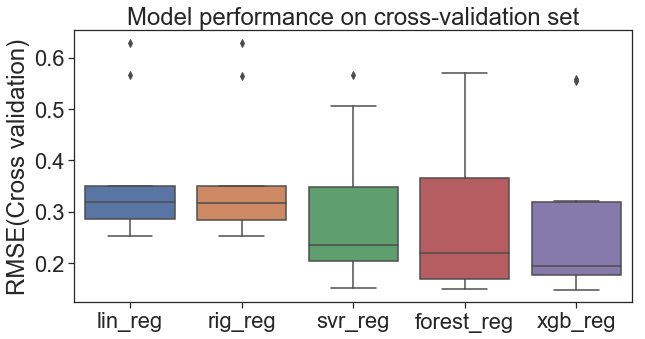

In [68]:
# Set figure size
plt.figure(figsize = (10,5))

# Display box plots
sns.boxplot(x = names, y = rmse_scores)

plt.title('Model performance on cross-validation set')
plt.ylabel('RMSE(Cross validation)')

- XGBoost regression has the lowest RMSE followed by Random Forest. 

## 2. Hyperparameter Tuning

Let's tune the hyperparameters of XGBoost regressor by cross-validation

In [53]:
# Import grid and randomize search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [69]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective = 'reg:linear')
                         
params = {'max_depth': range(1,10,2), 'min_child_weight': range(1,6,2),'gamma':[i/100 for i in range(0,6)],
         'subsample':[i/10 for i in range(5,9)],'colsample_bytree': [i/10 for i in range(5,9)],
         'learning_rate': [0.01, 0.02, 0.05, 0.1], 'n_estimators': [5000, 10000]}
              
rsearch_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params, 
                                  scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, 
                                  random_state = 42, verbose = 1)  
                                                        
rsearch_xgb.fit(X_train_prepared.values, y_train.values)
print('\n')
print('Best RMSE:', -rsearch_xgb.best_score_) 
print('Best hyperparameters:', rsearch_xgb.best_params_) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.7min finished




Best RMSE: 0.132374593348
Best hyperparameters: {'subsample': 0.6, 'n_estimators': 5000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.01, 'colsample_bytree': 0.7}


## 3. Feature Importnances 

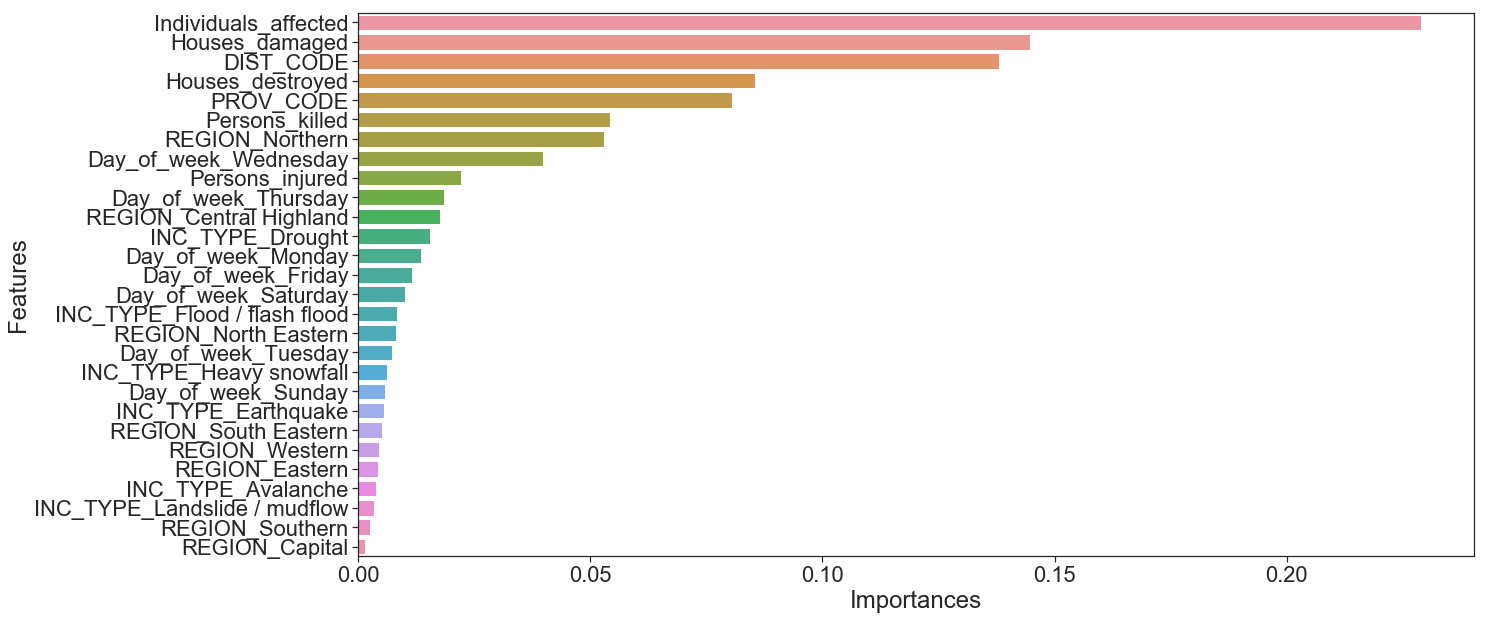

In [72]:
importances = rsearch_xgb.best_estimator_.feature_importances_
features = X_train_prepared.columns
importances_df =pd.DataFrame({'Features': features, 
                              'Importances': importances}).sort_values('Importances', ascending=False)
# Bar plot
plt.figure(figsize = (20,10))
sns.barplot(data = importances_df,  x = 'Importances', y = 'Features')

## 4. Prediction on the Test Set

In [73]:
# XGBoost test prediction
model_xgb = rsearch_xgb.best_estimator_
xgb_prediction = Test_prediction(model_xgb, X_train_prepared, y_train, X_test_prepared, y_test)
xgb_prediction[0]

Test RMSE: 0.157676747443
